## 파일불러온후 split

In [11]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_excel('C:/Users/lucky/바탕 화면/Capstone-Design/processed_data_2.xlsx',header=0)

In [13]:
data

,mod_d,region,town_t,apt_t,psu,sex,age,incm,ho_incm,incm5,...,LS_1YR,LK_EDU,LK_LB_CO,LK_LB_US,LK_LB_IT,LK_LB_EF,LF_secur_y,LF_BUYER,LF_SAFE,target
0,2020.03.05.,1,1,2,A901,1,80,1,1,2,...,1,2,1,2,88,8,1,2,1,저
1,2020.03.05.,1,1,2,A901,1,78,4,4,5,...,1,2,2,8,88,8,1,1,1,고
2,2020.03.05.,1,1,2,A901,2,75,4,4,5,...,2,2,2,8,88,8,1,1,1,고
3,2020.03.05.,1,1,2,A901,2,80,2,1,2,...,1,2,2,8,88,8,1,1,1,고
4,2020.03.05.,1,1,2,A901,2,71,1,1,2,...,2,1,2,8,88,8,1,1,1,저
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,2020.03.05.,8,1,2,R904,1,1,3,3,4,...,1,3,3,8,88,8,1,1,1,저
6074,2020.03.05.,8,1,2,R904,2,73,2,1,2,...,2,2,1,2,88,8,1,1,1,저
6075,2020.03.05.,8,1,2,R904,1,43,3,4,4,...,2,2,1,2,88,8,1,1,2,고
6076,2020.03.05.,8,1,2,R904,1,10,3,4,4,...,2,2,2,8,88,8,1,1,2,고


In [14]:
data.drop(['mod_d'], axis='columns', inplace=True)

In [15]:
data.drop(['psu'], axis='columns', inplace=True)

In [16]:
from sklearn.model_selection import train_test_split # train / test

In [17]:
y=data['target']
X=data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape)

(4862, 365) (1216, 365)


## Catboost

In [22]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
cat_clf = CatBoostClassifier(random_state=1234)
cat_clf.fit(X_train,y_train)
pred=cat_clf.predict(X_test)

Learning rate set to 0.085773
0:	learn: 1.0429140	total: 10.7ms	remaining: 10.7s
1:	learn: 0.9963410	total: 21.7ms	remaining: 10.8s
2:	learn: 0.9584449	total: 31.7ms	remaining: 10.5s
3:	learn: 0.9282908	total: 43.4ms	remaining: 10.8s
4:	learn: 0.9012697	total: 54.9ms	remaining: 10.9s
5:	learn: 0.8780006	total: 65ms	remaining: 10.8s
6:	learn: 0.8586071	total: 75.2ms	remaining: 10.7s
7:	learn: 0.8416230	total: 85.8ms	remaining: 10.6s
8:	learn: 0.8276450	total: 95.8ms	remaining: 10.6s
9:	learn: 0.8151981	total: 106ms	remaining: 10.5s
10:	learn: 0.8047474	total: 116ms	remaining: 10.5s
11:	learn: 0.7957093	total: 127ms	remaining: 10.4s
12:	learn: 0.7880534	total: 136ms	remaining: 10.3s
13:	learn: 0.7804531	total: 146ms	remaining: 10.3s
14:	learn: 0.7733587	total: 157ms	remaining: 10.3s
15:	learn: 0.7668209	total: 166ms	remaining: 10.2s
16:	learn: 0.7613240	total: 178ms	remaining: 10.3s
17:	learn: 0.7563530	total: 188ms	remaining: 10.3s
18:	learn: 0.7522960	total: 200ms	remaining: 10.3s
19:	

174:	learn: 0.5865150	total: 1.9s	remaining: 8.98s
175:	learn: 0.5855676	total: 1.92s	remaining: 8.97s
176:	learn: 0.5852296	total: 1.93s	remaining: 8.96s
177:	learn: 0.5841367	total: 1.94s	remaining: 8.95s
178:	learn: 0.5834896	total: 1.95s	remaining: 8.93s
179:	learn: 0.5826356	total: 1.96s	remaining: 8.91s
180:	learn: 0.5815965	total: 1.97s	remaining: 8.9s
181:	learn: 0.5805555	total: 1.98s	remaining: 8.89s
182:	learn: 0.5795807	total: 1.99s	remaining: 8.88s
183:	learn: 0.5784412	total: 2s	remaining: 8.87s
184:	learn: 0.5773070	total: 2.01s	remaining: 8.86s
185:	learn: 0.5768870	total: 2.02s	remaining: 8.84s
186:	learn: 0.5764153	total: 2.03s	remaining: 8.82s
187:	learn: 0.5757175	total: 2.04s	remaining: 8.8s
188:	learn: 0.5749089	total: 2.05s	remaining: 8.8s
189:	learn: 0.5743452	total: 2.06s	remaining: 8.79s
190:	learn: 0.5736954	total: 2.07s	remaining: 8.77s
191:	learn: 0.5729821	total: 2.08s	remaining: 8.76s
192:	learn: 0.5721108	total: 2.09s	remaining: 8.75s
193:	learn: 0.57150

337:	learn: 0.4850008	total: 3.63s	remaining: 7.1s
338:	learn: 0.4844552	total: 3.64s	remaining: 7.09s
339:	learn: 0.4840880	total: 3.65s	remaining: 7.08s
340:	learn: 0.4834555	total: 3.66s	remaining: 7.07s
341:	learn: 0.4830518	total: 3.67s	remaining: 7.05s
342:	learn: 0.4825982	total: 3.68s	remaining: 7.04s
343:	learn: 0.4821300	total: 3.69s	remaining: 7.03s
344:	learn: 0.4814433	total: 3.7s	remaining: 7.02s
345:	learn: 0.4809569	total: 3.71s	remaining: 7s
346:	learn: 0.4806783	total: 3.71s	remaining: 6.99s
347:	learn: 0.4803239	total: 3.72s	remaining: 6.98s
348:	learn: 0.4797967	total: 3.73s	remaining: 6.97s
349:	learn: 0.4794238	total: 3.74s	remaining: 6.95s
350:	learn: 0.4786718	total: 3.75s	remaining: 6.94s
351:	learn: 0.4782737	total: 3.76s	remaining: 6.93s
352:	learn: 0.4777386	total: 3.77s	remaining: 6.92s
353:	learn: 0.4771220	total: 3.78s	remaining: 6.91s
354:	learn: 0.4765529	total: 3.79s	remaining: 6.89s
355:	learn: 0.4760703	total: 3.8s	remaining: 6.88s
356:	learn: 0.4754

508:	learn: 0.4048599	total: 5.4s	remaining: 5.21s
509:	learn: 0.4042815	total: 5.42s	remaining: 5.21s
510:	learn: 0.4037592	total: 5.43s	remaining: 5.2s
511:	learn: 0.4032326	total: 5.44s	remaining: 5.19s
512:	learn: 0.4030939	total: 5.45s	remaining: 5.17s
513:	learn: 0.4027700	total: 5.46s	remaining: 5.16s
514:	learn: 0.4025026	total: 5.47s	remaining: 5.15s
515:	learn: 0.4023398	total: 5.48s	remaining: 5.14s
516:	learn: 0.4019846	total: 5.49s	remaining: 5.13s
517:	learn: 0.4013273	total: 5.5s	remaining: 5.12s
518:	learn: 0.4009196	total: 5.51s	remaining: 5.11s
519:	learn: 0.4005628	total: 5.52s	remaining: 5.09s
520:	learn: 0.4001168	total: 5.53s	remaining: 5.08s
521:	learn: 0.3999060	total: 5.54s	remaining: 5.07s
522:	learn: 0.3997322	total: 5.55s	remaining: 5.06s
523:	learn: 0.3994620	total: 5.56s	remaining: 5.05s
524:	learn: 0.3988637	total: 5.57s	remaining: 5.04s
525:	learn: 0.3986407	total: 5.58s	remaining: 5.03s
526:	learn: 0.3981479	total: 5.59s	remaining: 5.02s
527:	learn: 0.3

672:	learn: 0.3421837	total: 7.11s	remaining: 3.45s
673:	learn: 0.3419511	total: 7.12s	remaining: 3.44s
674:	learn: 0.3413692	total: 7.13s	remaining: 3.43s
675:	learn: 0.3409124	total: 7.14s	remaining: 3.42s
676:	learn: 0.3404980	total: 7.16s	remaining: 3.41s
677:	learn: 0.3402529	total: 7.17s	remaining: 3.4s
678:	learn: 0.3400138	total: 7.17s	remaining: 3.39s
679:	learn: 0.3398389	total: 7.18s	remaining: 3.38s
680:	learn: 0.3396369	total: 7.19s	remaining: 3.37s
681:	learn: 0.3391988	total: 7.21s	remaining: 3.36s
682:	learn: 0.3387067	total: 7.22s	remaining: 3.35s
683:	learn: 0.3384509	total: 7.23s	remaining: 3.34s
684:	learn: 0.3380581	total: 7.24s	remaining: 3.33s
685:	learn: 0.3375949	total: 7.25s	remaining: 3.32s
686:	learn: 0.3374454	total: 7.26s	remaining: 3.31s
687:	learn: 0.3372116	total: 7.27s	remaining: 3.3s
688:	learn: 0.3366089	total: 7.28s	remaining: 3.29s
689:	learn: 0.3363760	total: 7.29s	remaining: 3.27s
690:	learn: 0.3359006	total: 7.3s	remaining: 3.27s
691:	learn: 0.3

848:	learn: 0.2877726	total: 8.96s	remaining: 1.59s
849:	learn: 0.2875854	total: 8.97s	remaining: 1.58s
850:	learn: 0.2870471	total: 8.98s	remaining: 1.57s
851:	learn: 0.2867669	total: 8.99s	remaining: 1.56s
852:	learn: 0.2865311	total: 9s	remaining: 1.55s
853:	learn: 0.2863344	total: 9.01s	remaining: 1.54s
854:	learn: 0.2861978	total: 9.02s	remaining: 1.53s
855:	learn: 0.2858474	total: 9.04s	remaining: 1.52s
856:	learn: 0.2856334	total: 9.04s	remaining: 1.51s
857:	learn: 0.2854232	total: 9.05s	remaining: 1.5s
858:	learn: 0.2850760	total: 9.06s	remaining: 1.49s
859:	learn: 0.2848164	total: 9.07s	remaining: 1.48s
860:	learn: 0.2845601	total: 9.08s	remaining: 1.47s
861:	learn: 0.2843022	total: 9.09s	remaining: 1.46s
862:	learn: 0.2841802	total: 9.1s	remaining: 1.45s
863:	learn: 0.2838694	total: 9.11s	remaining: 1.43s
864:	learn: 0.2836672	total: 9.12s	remaining: 1.42s
865:	learn: 0.2834619	total: 9.13s	remaining: 1.41s
866:	learn: 0.2833059	total: 9.14s	remaining: 1.4s
867:	learn: 0.2831

In [33]:
accuracy = accuracy_score(y_test, pred)

In [34]:
print('catboost 예측 정확도 : {0:.4f}'.format(accuracy))
print('\nCatBoostClassifier 기본 하이퍼파라미터:\n', cat_clf.get_params()) # catboost는 지정한 파라미터만 출력함

catboost 예측 정확도 : 0.7204

CatBoostClassifier 기본 하이퍼파라미터:
 {'random_state': 1234}


In [35]:
from sklearn.model_selection import GridSearchCV

cat_clf = CatBoostClassifier()

cat_param_grid = {
    'iterations' : [100,200,300],
    'learning_rate' : [0.01,0.05,0.1,0.15,0.2],
    'depth' : [4,5,6,7,8]
}

cat_grid = GridSearchCV(cat_clf, param_grid = cat_param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
cat_grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 28.4min finished


0:	learn: 1.0643894	total: 17.5ms	remaining: 5.24s
1:	learn: 1.0337904	total: 32.6ms	remaining: 4.86s
2:	learn: 1.0067141	total: 49ms	remaining: 4.85s
3:	learn: 0.9831984	total: 65ms	remaining: 4.81s
4:	learn: 0.9619495	total: 79.3ms	remaining: 4.68s
5:	learn: 0.9435537	total: 97.5ms	remaining: 4.78s
6:	learn: 0.9259085	total: 113ms	remaining: 4.71s
7:	learn: 0.9094574	total: 125ms	remaining: 4.57s
8:	learn: 0.8956789	total: 143ms	remaining: 4.63s
9:	learn: 0.8833696	total: 158ms	remaining: 4.6s
10:	learn: 0.8714773	total: 166ms	remaining: 4.35s
11:	learn: 0.8604079	total: 181ms	remaining: 4.34s
12:	learn: 0.8497966	total: 195ms	remaining: 4.32s
13:	learn: 0.8403081	total: 213ms	remaining: 4.35s
14:	learn: 0.8308958	total: 231ms	remaining: 4.4s
15:	learn: 0.8233273	total: 245ms	remaining: 4.35s
16:	learn: 0.8152513	total: 261ms	remaining: 4.35s
17:	learn: 0.8085548	total: 276ms	remaining: 4.32s
18:	learn: 0.8026820	total: 287ms	remaining: 4.24s
19:	learn: 0.7967899	total: 300ms	remaini

163:	learn: 0.6230088	total: 2.69s	remaining: 2.23s
164:	learn: 0.6220272	total: 2.71s	remaining: 2.22s
165:	learn: 0.6213291	total: 2.73s	remaining: 2.2s
166:	learn: 0.6203500	total: 2.74s	remaining: 2.19s
167:	learn: 0.6196913	total: 2.76s	remaining: 2.17s
168:	learn: 0.6190223	total: 2.77s	remaining: 2.15s
169:	learn: 0.6182263	total: 2.79s	remaining: 2.13s
170:	learn: 0.6179147	total: 2.81s	remaining: 2.12s
171:	learn: 0.6168799	total: 2.82s	remaining: 2.1s
172:	learn: 0.6164562	total: 2.84s	remaining: 2.08s
173:	learn: 0.6155958	total: 2.85s	remaining: 2.07s
174:	learn: 0.6145896	total: 2.87s	remaining: 2.05s
175:	learn: 0.6138806	total: 2.89s	remaining: 2.03s
176:	learn: 0.6133317	total: 2.9s	remaining: 2.02s
177:	learn: 0.6123172	total: 2.92s	remaining: 2s
178:	learn: 0.6117908	total: 2.94s	remaining: 1.99s
179:	learn: 0.6109845	total: 2.95s	remaining: 1.97s
180:	learn: 0.6107184	total: 2.97s	remaining: 1.95s
181:	learn: 0.6096865	total: 2.98s	remaining: 1.94s
182:	learn: 0.6087

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x00000178104A9C70>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8],
                         'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]},
             scoring='accuracy', verbose=1)

In [36]:
print("최고 평균 정확도 : {0:.4f}".format(cat_grid.best_score_))
print("최고의 파라미터 : ", cat_grid.best_params_)

최고 평균 정확도 : 0.7275
최고의 파라미터 :  {'depth': 7, 'iterations': 300, 'learning_rate': 0.05}


In [37]:
cv_result_df = pd.DataFrame(cat_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [38]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
56,"{'depth': 7, 'iterations': 300, 'learning_rate...",0.727478,1
2,"{'depth': 4, 'iterations': 100, 'learning_rate...",0.726860,2
41,"{'depth': 6, 'iterations': 300, 'learning_rate...",0.726654,3
51,"{'depth': 7, 'iterations': 200, 'learning_rate...",0.726449,4
52,"{'depth': 7, 'iterations': 200, 'learning_rate...",0.726449,4
47,"{'depth': 7, 'iterations': 100, 'learning_rate...",0.726244,6
26,"{'depth': 5, 'iterations': 300, 'learning_rate...",0.726243,7
3,"{'depth': 4, 'iterations': 100, 'learning_rate...",0.725832,8
11,"{'depth': 4, 'iterations': 300, 'learning_rate...",0.725627,9
71,"{'depth': 8, 'iterations': 300, 'learning_rate...",0.725626,10


## - early stopping

In [46]:
cat_clf = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=7)
evals = [(X_test, y_test)]
cat_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, verbose=1)

0:	learn: 1.0643894	test: 1.0656863	best: 1.0656863 (0)	total: 15.7ms	remaining: 4.69s
1:	learn: 1.0337904	test: 1.0357140	best: 1.0357140 (1)	total: 32.1ms	remaining: 4.78s
2:	learn: 1.0067141	test: 1.0098550	best: 1.0098550 (2)	total: 47.9ms	remaining: 4.74s
3:	learn: 0.9831984	test: 0.9873490	best: 0.9873490 (3)	total: 62.8ms	remaining: 4.65s
4:	learn: 0.9619495	test: 0.9664934	best: 0.9664934 (4)	total: 76.5ms	remaining: 4.51s
5:	learn: 0.9435537	test: 0.9488879	best: 0.9488879 (5)	total: 92.9ms	remaining: 4.55s
6:	learn: 0.9259085	test: 0.9317810	best: 0.9317810 (6)	total: 106ms	remaining: 4.42s
7:	learn: 0.9094574	test: 0.9158125	best: 0.9158125 (7)	total: 118ms	remaining: 4.3s
8:	learn: 0.8956789	test: 0.9036540	best: 0.9036540 (8)	total: 132ms	remaining: 4.28s
9:	learn: 0.8833696	test: 0.8921991	best: 0.8921991 (9)	total: 146ms	remaining: 4.22s
10:	learn: 0.8714773	test: 0.8806499	best: 0.8806499 (10)	total: 152ms	remaining: 4s
11:	learn: 0.8604079	test: 0.8701921	best: 0.87019

94:	learn: 0.6702616	test: 0.7374550	best: 0.7374550 (94)	total: 1.4s	remaining: 3.01s
95:	learn: 0.6692785	test: 0.7370433	best: 0.7370433 (95)	total: 1.41s	remaining: 3s
96:	learn: 0.6685243	test: 0.7368897	best: 0.7368897 (96)	total: 1.43s	remaining: 3s
97:	learn: 0.6678411	test: 0.7365483	best: 0.7365483 (97)	total: 1.45s	remaining: 2.98s
98:	learn: 0.6672375	test: 0.7364548	best: 0.7364548 (98)	total: 1.46s	remaining: 2.96s
99:	learn: 0.6661439	test: 0.7360611	best: 0.7360611 (99)	total: 1.47s	remaining: 2.94s
100:	learn: 0.6654677	test: 0.7358310	best: 0.7358310 (100)	total: 1.49s	remaining: 2.93s
101:	learn: 0.6647813	test: 0.7357151	best: 0.7357151 (101)	total: 1.5s	remaining: 2.91s
102:	learn: 0.6640694	test: 0.7357395	best: 0.7357151 (101)	total: 1.51s	remaining: 2.89s
103:	learn: 0.6629280	test: 0.7355573	best: 0.7355573 (103)	total: 1.53s	remaining: 2.88s
104:	learn: 0.6620743	test: 0.7356134	best: 0.7355573 (103)	total: 1.54s	remaining: 2.86s
105:	learn: 0.6617186	test: 0.

188:	learn: 0.6040945	test: 0.7320531	best: 0.7315123 (153)	total: 2.77s	remaining: 1.63s
189:	learn: 0.6032980	test: 0.7320253	best: 0.7315123 (153)	total: 2.79s	remaining: 1.61s
190:	learn: 0.6027324	test: 0.7319321	best: 0.7315123 (153)	total: 2.8s	remaining: 1.6s
191:	learn: 0.6018925	test: 0.7320733	best: 0.7315123 (153)	total: 2.82s	remaining: 1.58s
192:	learn: 0.6011548	test: 0.7320092	best: 0.7315123 (153)	total: 2.84s	remaining: 1.58s
193:	learn: 0.6004359	test: 0.7319443	best: 0.7315123 (153)	total: 2.86s	remaining: 1.56s
194:	learn: 0.5996700	test: 0.7318767	best: 0.7315123 (153)	total: 2.87s	remaining: 1.54s
195:	learn: 0.5990200	test: 0.7317847	best: 0.7315123 (153)	total: 2.88s	remaining: 1.53s
196:	learn: 0.5983853	test: 0.7321285	best: 0.7315123 (153)	total: 2.9s	remaining: 1.52s
197:	learn: 0.5978255	test: 0.7320045	best: 0.7315123 (153)	total: 2.91s	remaining: 1.5s
198:	learn: 0.5973518	test: 0.7319731	best: 0.7315123 (153)	total: 2.93s	remaining: 1.49s
199:	learn: 0.

291:	learn: 0.5384175	test: 0.7330835	best: 0.7314126 (226)	total: 4.28s	remaining: 117ms
292:	learn: 0.5380320	test: 0.7330262	best: 0.7314126 (226)	total: 4.3s	remaining: 103ms
293:	learn: 0.5374379	test: 0.7330833	best: 0.7314126 (226)	total: 4.31s	remaining: 88ms
294:	learn: 0.5368237	test: 0.7332522	best: 0.7314126 (226)	total: 4.33s	remaining: 73.3ms
295:	learn: 0.5362047	test: 0.7332802	best: 0.7314126 (226)	total: 4.34s	remaining: 58.6ms
296:	learn: 0.5356700	test: 0.7334043	best: 0.7314126 (226)	total: 4.35s	remaining: 44ms
297:	learn: 0.5350420	test: 0.7335518	best: 0.7314126 (226)	total: 4.37s	remaining: 29.3ms
298:	learn: 0.5340726	test: 0.7334246	best: 0.7314126 (226)	total: 4.38s	remaining: 14.7ms
299:	learn: 0.5332891	test: 0.7336732	best: 0.7314126 (226)	total: 4.4s	remaining: 0us

bestTest = 0.731412627
bestIteration = 226

Shrink model to first 227 iterations.


## feature importance

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

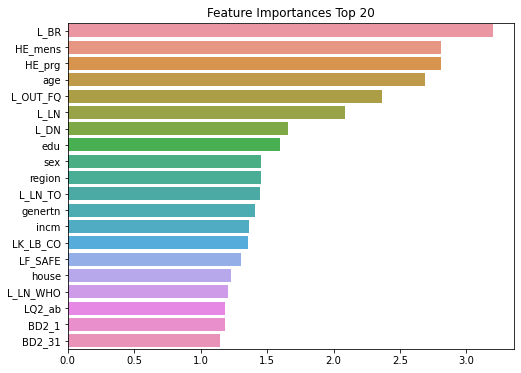

In [48]:
feature_importance_values = cat_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()